Epoch 1/20
22/22 [==============================] - 7s 312ms/step - loss: 0.5969 - accuracy: 0.8754 - val_loss: 0.1142 - val_accuracy: 0.9729
Epoch 2/20
22/22 [==============================] - 7s 332ms/step - loss: 0.0299 - accuracy: 0.9961 - val_loss: 0.0588 - val_accuracy: 0.9815
Epoch 3/20
22/22 [==============================] - 6s 278ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9843
Epoch 4/20
22/22 [==============================] - 6s 267ms/step - loss: 7.8625e-04 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 0.9872
Epoch 5/20
22/22 [==============================] - 6s 266ms/step - loss: 2.1158e-04 - accuracy: 1.0000 - val_loss: 0.0425 - val_accuracy: 0.9843
Epoch 6/20
22/22 [==============================] - 6s 283ms/step - loss: 5.8986e-05 - accuracy: 1.0000 - val_loss: 0.0416 - val_accuracy: 0.9858
Epoch 7/20
22/22 [==============================] - 7s 299ms/step - loss: 1.9899e-05 - accuracy: 1.0000 - val_loss: 0.0418 - val_accurac

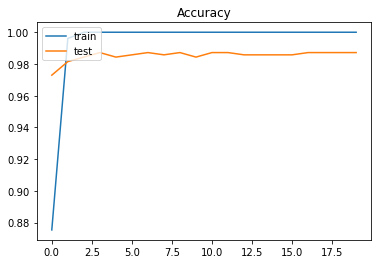

In [1]:
import pickle
from keras.models import Sequential
from keras.layers import Dropout, Dense
import keras
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

path = 'text/genre.pickle'
data = pickle.load(open(path, 'rb'))

out_size = 4
x = data[1]
y = data[0]
in_size = x[0].shape[0]

y = keras.utils.to_categorical(y, out_size)

x_train,x_test, y_train, y_test = train_test_split(np.array(x),np.array(y), test_size=0.2)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))
          
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)
          
          
hist = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('正解率', score[1], 'loss', score[0])

model.save_weights('./text/genre-model.hdf5')


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()